In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# 🎯 Generating synthetic data for demonstration
np.random.seed(0)
n = 500

# ✅ Strictly stationary series: normally distributed random noise
strict_stationary_series = np.random.normal(0, 1, n)

# ❌ Non-strictly stationary series: changing variance (heteroscedastic)
non_strict_stationary_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
])

# ⚙️ Function to split series into two halves and apply K-S test
def ks_test_stationarity(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# 🔬 Perform K-S test on strictly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)
print(f"Strict Stationary Series - KS Statistic: {ks_stat_strict:.3f}, P-value: {ks_pvalue_strict:.3f}")

# 🔬 Perform K-S test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)
print(f"Non-Strict Stationary Series - KS Statistic: {ks_stat_non_strict:.3f}, P-value: {ks_pvalue_non_strict:.3f}")


Strict Stationary Series - KS Statistic: 0.068, P-value: 0.611
Non-Strict Stationary Series - KS Statistic: 0.184, P-value: 0.000


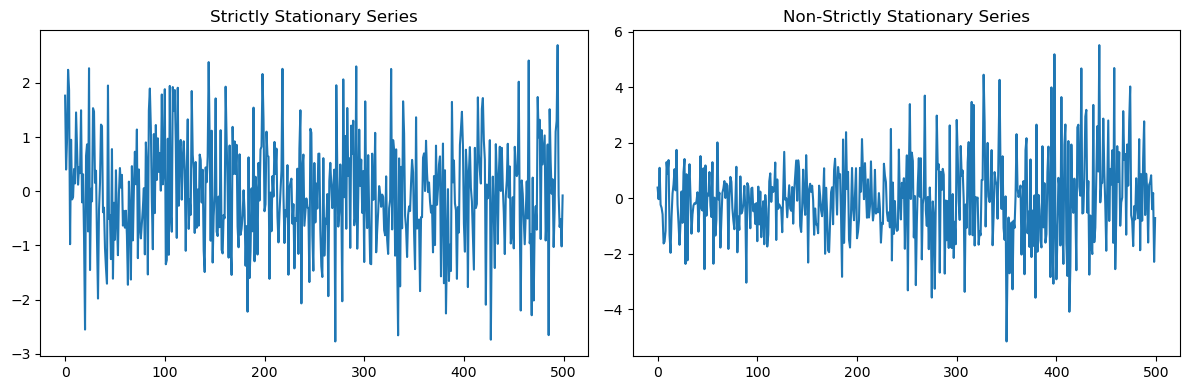

In [2]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(strict_stationary_series)
plt.title("Strictly Stationary Series")

plt.subplot(1, 2, 2)
plt.plot(non_strict_stationary_series)
plt.title("Non-Strictly Stationary Series")

plt.tight_layout()
plt.show()


### ✅ Interpretation of K-S Test:
Null Hypothesis (H₀): Both halves of the series come from the same distribution → Stationary

If p-value > 0.05 → Fail to reject H₀ → Likely stationary

If p-value < 0.05 → Reject H₀ → Not stationary (distribution changed over time)

# 🎯 Comparing 4 Types of Series:
##### ✅ Strictly Stationary – iid noise

##### ⚠️ Weakly Stationary – constant mean/variance but not identically distributed

##### 📈 Trend Stationary – deterministic upward/downward trend

##### 🔁 Seasonal/Non-Stationary – repeating seasonal pattern (non-stationary)

We'll also use the ADF + KPSS tests + plots to help you visualize them.

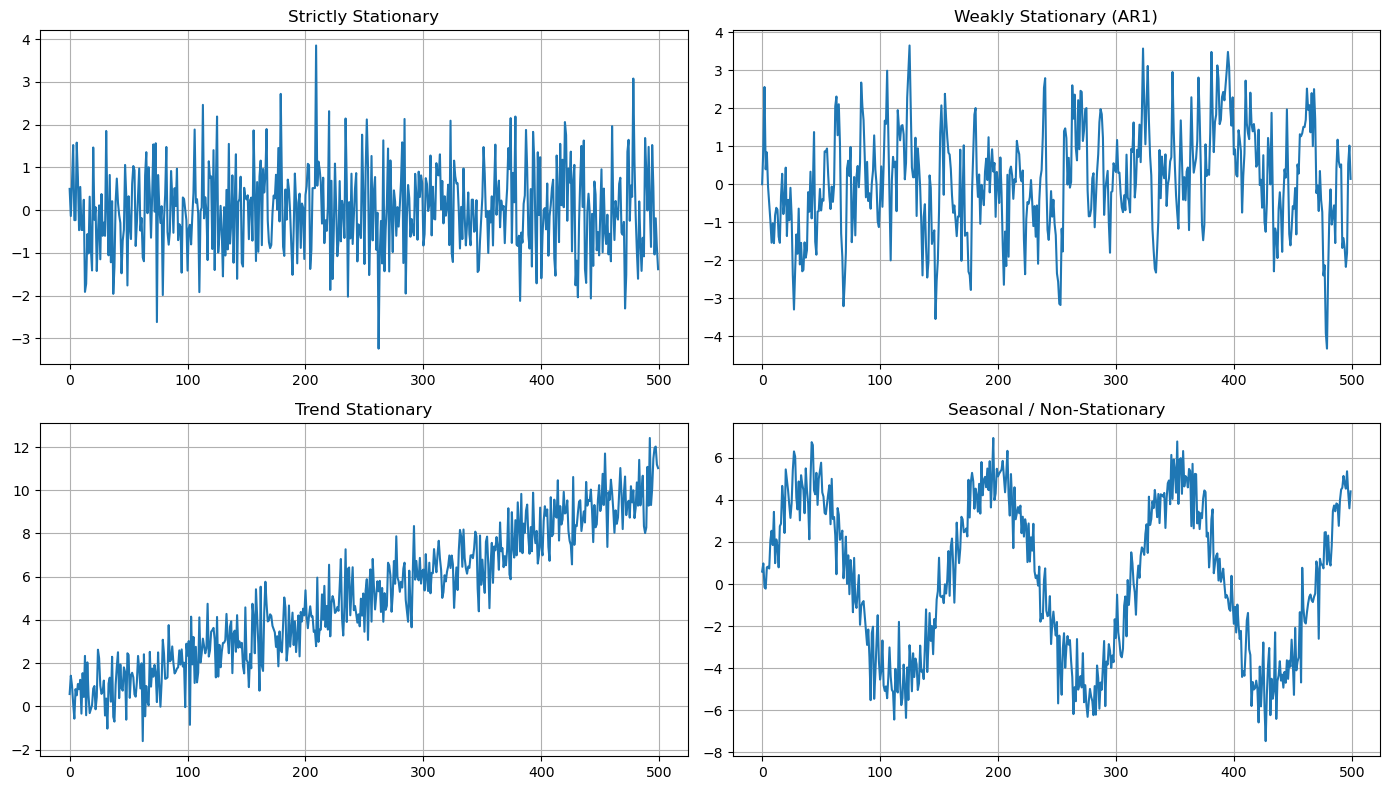


🔍 Strictly Stationary Series
ADF p-value: 0.0000 ✅ Stationary
KPSS p-value: 0.1000 ✅ Stationary
K-S p-value: 0.8889 ✅ Same distribution

🔍 Weakly Stationary (AR1) Series
ADF p-value: 0.0000 ✅ Stationary
KPSS p-value: 0.0504 ✅ Stationary
K-S p-value: 0.0000 ❌ Different distribution

🔍 Trend Stationary Series
ADF p-value: 0.9790 ❌ Non-Stationary
KPSS p-value: 0.0100 ❌ Non-Stationary
K-S p-value: 0.0000 ❌ Different distribution

🔍 Seasonal / Non-Stationary Series
ADF p-value: 0.0010 ✅ Stationary
KPSS p-value: 0.1000 ✅ Stationary
K-S p-value: 0.0000 ❌ Different distribution


C:\Users\weare\AppData\Local\Temp\ipykernel_23140\2914212145.py:52: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ , kpss_crit = kpss(series, regression='c', nlags='auto')
C:\Users\weare\AppData\Local\Temp\ipykernel_23140\2914212145.py:52: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, *_ , kpss_crit = kpss(series, regression='c', nlags='auto')
C:\Users\weare\AppData\Local\Temp\ipykernel_23140\2914212145.py:52: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ , kpss_crit = kpss(series, regression='c', nlags='auto')


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from statsmodels.tsa.stattools import adfuller, kpss

np.random.seed(42)
n = 500

# 📘 1. Strictly Stationary: iid white noise
strict_stationary = np.random.normal(0, 1, n)

# 📙 2. Weakly Stationary: AR(1) process (mean-reverting, constant variance)
phi = 0.7
weak_stationary = [0]
for i in range(1, n):
    weak_stationary.append(phi * weak_stationary[-1] + np.random.normal(0, 1))
weak_stationary = np.array(weak_stationary)

# 📕 3. Trend Stationary: linear upward trend + noise
trend_stationary = np.linspace(0, 10, n) + np.random.normal(0, 1, n)

# 📗 4. Seasonal / Non-Stationary: periodic sinusoidal pattern + noise
seasonal_non_stationary = 5 * np.sin(np.linspace(0, 20, n)) + np.random.normal(0, 1, n)

# 📊 Plotting All Series
series_list = [
    ("Strictly Stationary", strict_stationary),
    ("Weakly Stationary (AR1)", weak_stationary),
    ("Trend Stationary", trend_stationary),
    ("Seasonal / Non-Stationary", seasonal_non_stationary)
]

plt.figure(figsize=(14, 8))
for i, (title, series) in enumerate(series_list):
    plt.subplot(2, 2, i + 1)
    plt.plot(series)
    plt.title(title)
    plt.grid(True)
plt.tight_layout()
plt.show()

# 🧪 Function: ADF + KPSS + K-S
def test_stationarity(name, series):
    print(f"\n🔍 {name} Series")

    # ADF Test
    adf_stat, adf_p, *_ , adf_crit = adfuller(series)
    print(f"ADF p-value: {adf_p:.4f} {'✅ Stationary' if adf_p < 0.05 else '❌ Non-Stationary'}")

    # KPSS Test
    kpss_stat, kpss_p, *_ , kpss_crit = kpss(series, regression='c', nlags='auto')
    print(f"KPSS p-value: {kpss_p:.4f} {'❌ Non-Stationary' if kpss_p < 0.05 else '✅ Stationary'}")

    # K-S Test (split in two halves)
    split = len(series) // 2
    stat_ks, p_ks = ks_2samp(series[:split], series[split:])
    print(f"K-S p-value: {p_ks:.4f} {'✅ Same distribution' if p_ks > 0.05 else '❌ Different distribution'}")

# 🧪 Apply Tests
for name, series in series_list:
    test_stationarity(name, series)
